In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


Load mapping dictionaries to take states to their 2 char codes and vice versa.

In [2]:
with open('state_2_code.p', 'rb') as fp:
    state_2_code = pickle.load(fp)

In [3]:
with open('code_2_state.p', 'rb') as fp:
    code_2_state = pickle.load(fp)

# Load Veteran Data

Load each year's data and set the appropriate year in the year column

In [4]:
df_2005 = pd.read_csv('vet_2005.csv')
df_2005['year'] = pd.Series(2005, index=df_2005.index)

df_2006 = pd.read_csv('vet_2006.csv')
df_2006['year'] = pd.Series(2006, index=df_2006.index)

df_2007 = pd.read_csv('vet_2007.csv')
df_2007['year'] = pd.Series(2007, index=df_2007.index)

df_2008 = pd.read_csv('vet_2008.csv')
df_2008['year'] = pd.Series(2008, index=df_2008.index)

df_2009 = pd.read_csv('vet_2009.csv')
df_2009['year'] = pd.Series(2009, index=df_2009.index)

df_2010 = pd.read_csv('vet_2010.csv')
df_2010['year'] = pd.Series(2010, index=df_2010.index)

df_2011 = pd.read_csv('vet_2011.csv')
df_2011['year'] = pd.Series(2011, index=df_2011.index)

In [5]:
#Combine into one dataframe

frames = [df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011]
df_vets = pd.concat(frames)
df_vets = df_vets.drop(df_vets.columns[0], axis=1)

In [6]:
print(len(df_vets))

350


In [7]:
df_vets.head()

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,vet_females,...,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate,year
0,Alabama,403950,3344721,0.120772,135,535,0.252336,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.419978,13.601875,2005
1,Alaska,74482,446969,0.166638,24,131,0.183206,22.0,0.916667,2.0,...,NaN,9.0,NaN,NaN,5.0,NaN,4.0,32.222550,28.725835,2005
2,Arizona,538880,4238996,0.127124,225,945,0.238095,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.753266,19.458849,2005
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,79.0,0.975309,2.0,...,NaN,NaN,NaN,NaN,16.0,NaN,25.0,31.237466,18.078622,2005
4,California,2193336,25543447,0.085867,633,3206,0.197442,613.0,0.968404,20.0,...,NaN,NaN,NaN,220.0,NaN,NaN,317.0,28.860147,11.019220,2005


In [8]:
print(df_vets.columns)

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_males', 'vet_males_p',
       'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34',
       'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49',
       'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64',
       'vet_60', 'vet_65', 'vet_rate', 'civ_rate', 'year'],
      dtype='object')


Drop age range columnns, there are too many na values in these columns to reliably report on them. 

In [9]:
drop_col = ['vet_males', 'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64', 'vet_60', 'vet_65']
df_vets = df_vets.drop(drop_col, axis=1)

In [10]:
print(df_vets.columns)
df_vets.head()

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_rate', 'civ_rate', 'year'],
      dtype='object')


,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year
0,Alabama,403950,3344721,0.120772,135,535,0.252336,33.419978,13.601875,2005
1,Alaska,74482,446969,0.166638,24,131,0.183206,32.222550,28.725835,2005
2,Arizona,538880,4238996,0.127124,225,945,0.238095,41.753266,19.458849,2005
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,31.237466,18.078622,2005
4,California,2193336,25543447,0.085867,633,3206,0.197442,28.860147,11.019220,2005


Calculate figures strictly for the civilian population to compare with vets

In [11]:
df_vets['civ_pop'] = df_vets['overall_pop_18'] - df_vets['vet_pop']
df_vets['civ_suicides'] = df_vets['all_suicides'] - df_vets['vet_suicides']
df_vets['civ_suicides_p'] = df_vets['civ_suicides'] / df_vets['civ_pop']

Clean out asterisks from state names so that we can use the mapping dictionary. 

In [12]:
df_vets['state'] = df_vets.state.str.replace('*' , '')

print(df_vets.state.unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Map states to their 2 letter codes for easier processing later. 

In [13]:
df_vets['state'] = df_vets['state'].map(state_2_code)

print(df_vets['state'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ'
 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT'
 'VA' 'WA' 'WV' 'WI' 'WY']


Find means and medians between vet and civ population

In [14]:
for year in range(2005, 2012):
    print(f'{year} vet suicide mean: {df_vets.loc[df_vets["year"] == year]["vet_suicides"].mean()} \t median: {df_vets.loc[df_vets["year"] == year]["vet_suicides"].median()}')
    
print('\n')

for year in range(2005, 2012):
    print(f'{year} civ suicide mean: {df_vets.loc[df_vets["year"] == year]["civ_suicides"].mean()} \t median: {df_vets.loc[df_vets["year"] == year]["civ_suicides"].median()}')

2005 vet suicide mean: 136.92 	 median: 98.5
2006 vet suicide mean: 130.02 	 median: 93.5
2007 vet suicide mean: 136.24 	 median: 93.5
2008 vet suicide mean: 143.4 	 median: 96.5
2009 vet suicide mean: 145.64 	 median: 100.5
2010 vet suicide mean: 145.0 	 median: 104.5
2011 vet suicide mean: 146.92 	 median: 109.0


2005 civ suicide mean: 515.16 	 median: 405.0
2006 civ suicide mean: 535.38 	 median: 415.5
2007 civ suicide mean: 555.0 	 median: 434.0
2008 civ suicide mean: 576.44 	 median: 431.0
2009 civ suicide mean: 591.96 	 median: 465.0
2010 civ suicide mean: 621.46 	 median: 496.0
2011 civ suicide mean: 617.94 	 median: 491.5


In [15]:
nat_vet_suicide_by_year = df_vets.groupby('year')['vet_suicides'].sum()
nat_civ_suicide_by_year = df_vets.groupby('year')['civ_suicides'].sum()
#nat_population_by_year = df_vets.groupby('year')['overall_pop_18'].sum()

Show national trend of veteran suicide compared to civ suicide over time period. 

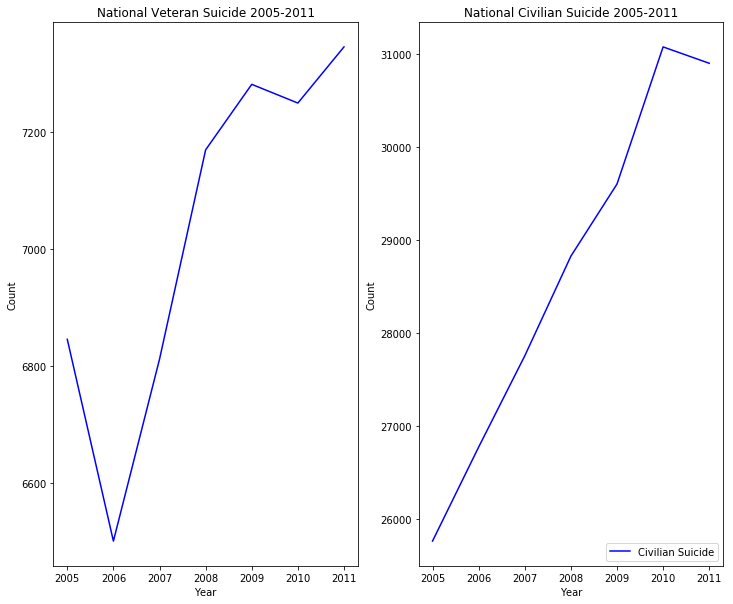

In [16]:
plt.figure(figsize=(12,10))
plt.legend(loc='lower right')


ax = plt.subplot(1,2,1)
ax.set_title('National Veteran Suicide 2005-2011')
ax.plot(nat_vet_suicide_by_year, color='b', label = 'Veteran Suicide')
plt.xlabel('Year')
plt.ylabel('Count')

ax = plt.subplot(1,2,2)
ax.set_title('National Civilian Suicide 2005-2011')
ax.plot(nat_civ_suicide_by_year, color='b', label = 'Civilian Suicide')
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend(loc='lower right')

Show same trend on the same graph

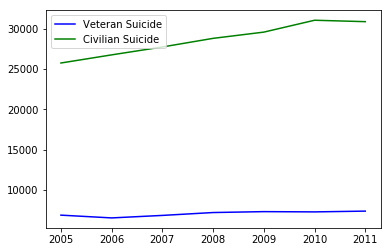

In [17]:
plt.plot(nat_vet_suicide_by_year, color='b', label = 'Veteran Suicide')
plt.plot(nat_civ_suicide_by_year, color='g', label = 'Civilian Suicide')
plt.legend(loc='upper left')

In [18]:
vet_pop_2005 = df_vets[df_vets['year'] == 2005]
print(type(vet_pop_2005))
print(vet_pop_2005.state[0])
vet_pop_2005 = vet_pop_2005.set_index('state')
print(vet_pop_2005.columns)

<class 'pandas.core.frame.DataFrame'>
AL
Index(['vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_rate', 'civ_rate', 'year',
       'civ_pop', 'civ_suicides', 'civ_suicides_p'],
      dtype='object')


In [19]:
def plot_pop_vs_suicide(df, year):
    plt.figure(figsize=(12,10))
    plt.subplot(3, 1, 1)
    x = range(50)
    plt.bar(x, df['vet_pop'])
    plt.xticks([], [])
    plt.title(f'{year} Veteran Population Compared to Veteran Suicide Rate')
    plt.legend(['Veteran Population'])

    plt.subplot(3, 1, 2)
    plt.bar(x, df['vet_suicides'])
    plt.xticks([], [])
    plt.legend(['Veteran suicides'])


    plt.subplot(3, 1, 3)
    plt.bar(x, df['vet_rate'])
    plt.xticks(x, df.index.values, rotation='vertical')
    plt.legend(['Veteran suicide rates'])

    plt.show()

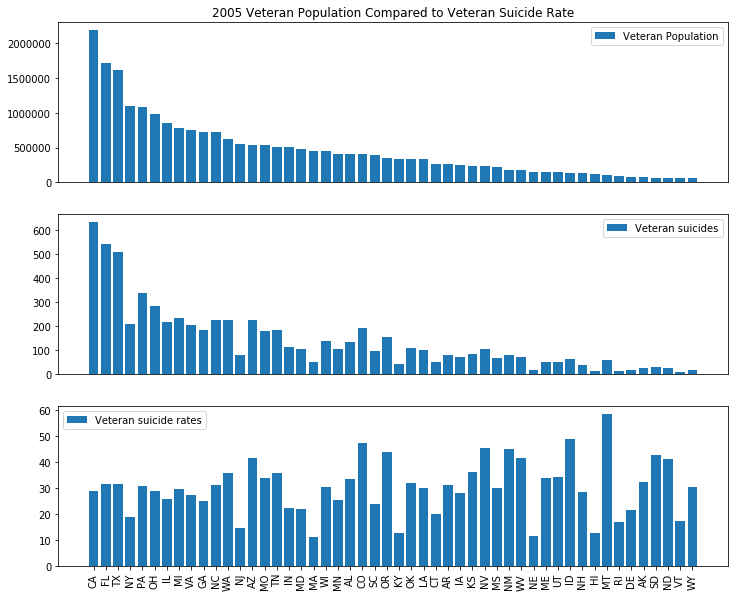

In [20]:
vet_pop_2005 = vet_pop_2005.sort_values(by=['vet_pop'], ascending=False)
plot_pop_vs_suicide(vet_pop_2005, 2005)

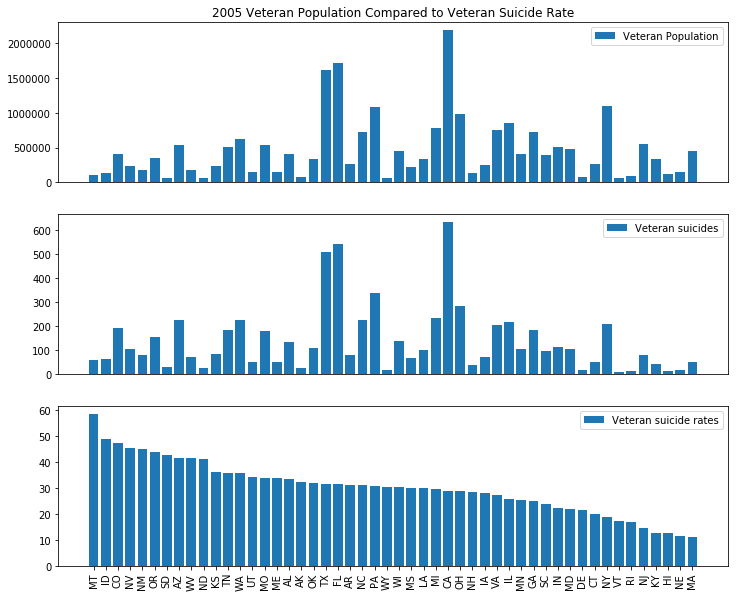

In [21]:
vet_pop_2005 = vet_pop_2005.sort_values(by=['vet_rate'], ascending=False)
plot_pop_vs_suicide(vet_pop_2005, 2005)

Notice above that the top 5 states in terms of veteran suicide rate have the 

# Load and Merge Median Household Income Data

In [22]:
df_mhi = pd.read_json('Clean_Data/median_household_income_normalized.json')

In [23]:
df_mhi.columns

Index(['1984 (19)', '1985 (20)', '1986', '1987 (21)', '1988', '1989', '1990',
       '1991', '1992 (22)', '1993 (23)', '1994 (24)', '1995 (25)', '1996',
       '1997', '1998', '1999 (29)', '2000 (30)', '2001', '2002', '2003',
       '2004(revised)', '2005', '2006', '2007', '2008', '2009 (36)',
       '2010 (37)', '2011', '2012', '2013 (38)', '2013 (39)', '2014', '2015',
       '2016', 'State'],
      dtype='object')

In [24]:
df_mhi.head()

,1984 (19),1985 (20),1986,1987 (21),1988,1989,1990,1991,1992 (22),1993 (23),...,2009 (36),2010 (37),2011,2012,2013 (38),2013 (39),2014,2015,2016,State
1,49335,50258,52068,52690,53124,54042,53350,51791,51390,51116,...,55683,54245,53401,53331,53518,55214,54398,57230,59039,United States
10,44918,44849,50866,55508,52180,50015,48805,51377,50738,44675,...,59446,62669,58946,68206,62519,61882,69219,70956,70982,D.C.
11,43547,45417,47785,49512,49575,48768,47545,46851,45877,46713,...,51045,48510,48121,48161,49341,50007,46777,49442,51176,Florida
12,43985,44791,50966,54010,51838,51492,49106,46782,48306,51807,...,48483,48566,49047,50304,48881,48420,50239,51410,53527,Georgia
13,63558,61627,60655,70807,64440,65500,69346,64032,70642,69803,...,62252,65543,62995,58815,63274,66187,72206,65329,72133,Hawaii


In [25]:
df_mhi.index.values

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52,  6,  7,  8,
        9], dtype=int64)

In [26]:
df_mhi = df_mhi[['2005', '2006', '2007', '2008', '2009 (36)', '2010 (37)', '2011', 'State']]
# df.rename(index=str, columns={"A": "a", "C": "c"})
df_mhi = df_mhi.rename(index=str, columns={"State": "state", "2009 (36)": "2009", "2010 (37)": "2010"})
df_mhi['state'] = df_mhi['state'].map(state_2_code)


In [27]:
df_mhi = df_mhi.drop(df_mhi[~df_mhi.state.isin(df_vets.state)].index) # drop all states that are not in the df_vets dataframe

In [28]:
print(df_mhi.columns)

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', 'state'], dtype='object')


In [29]:
df_vets['mhi'] = pd.Series(len(df_vets.values))
for year in range(2005, 2012):
    temp = df_mhi[[str(year), 'state']]
    for state in temp['state']:
        df_vets.loc[(df_vets['year'] == year) & (df_vets['state'] == state), 'mhi'] = temp[temp['state'] == state][str(year)].values[0]


Text(0.5,0.98,'Median Housing Income in Thousands 2005-2011')

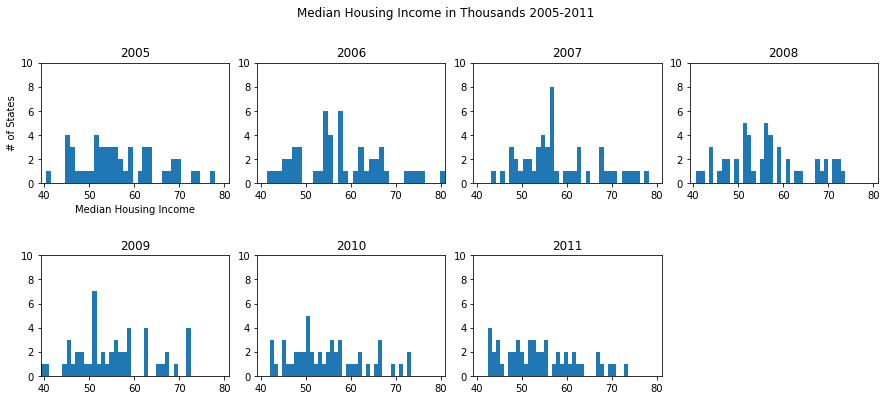

In [30]:
fig, axs = plt.subplots(2,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .6, wspace=.15)
x_lim = [min(df_vets['mhi']) /1000, max(df_vets['mhi']) /1000]
y_lim = [0, 10]

axs = axs.ravel()

def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

for ix, x  in df_vets.groupby('year'):
    i = ix - 2005
    axs[i].hist(x['mhi'] / 1000, bins=35)
    axs[i].set_xlim(x_lim)
    axs[i].set_ylim(y_lim)
    axs[i].set_title(f'{str(ix)}') 

axs[0].set_xlabel("Median Housing Income")
axs[0].set_ylabel("# of States")
    
fig.subplots_adjust(top=0.85)    
fig.delaxes(axs[7])
fig.suptitle('Median Housing Income in Thousands 2005-2011')

# Load and Merge Unemployment Data

In [31]:
df_unemp = pd.read_json('Clean_Data/df_unemployment_by_state.json')

In [32]:
df_unemp.head()

,employed,labor force,state,unemployed,unemployment rate,year
0,320813,344564,AK,23751,6.893059,2005
1,2049794,2146037,AL,96243,4.484685,2005
10,608957,626913,HI,17956,2.864193,2005
100,2914152,3058940,WI,144788,4.733274,2006
101,766403,806171,WV,39768,4.932948,2006


In [33]:
df_vets = pd.merge(df_vets, df_unemp, left_on=['state','year'], right_on=['state','year'])

In [34]:
df_vets.head()

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year,civ_pop,civ_suicides,civ_suicides_p,mhi,employed,labor force,unemployed,unemployment rate
0,AL,403950,3344721,0.120772,135,535,0.252336,33.419978,13.601875,2005,2940771,400,0.000136,45657.0,2049794,2146037,96243,4.484685
1,AK,74482,446969,0.166638,24,131,0.183206,32.222550,28.725835,2005,372487,107,0.000287,68690.0,320813,344564,23751,6.893059
2,AZ,538880,4238996,0.127124,225,945,0.238095,41.753266,19.458849,2005,3700116,720,0.000195,55606.0,2748371,2883225,134854,4.677193
3,AR,259304,2023819,0.128126,81,400,0.202500,31.237466,18.078622,2005,1764515,319,0.000181,45053.0,1275451,1345923,70472,5.235961
4,CA,2193336,25543447,0.085867,633,3206,0.197442,28.860147,11.019220,2005,23350111,2573,0.000110,63607.0,16582652,17530070,947418,5.404531


Text(0.5,0.98,'National Unemployment 2005-2011')

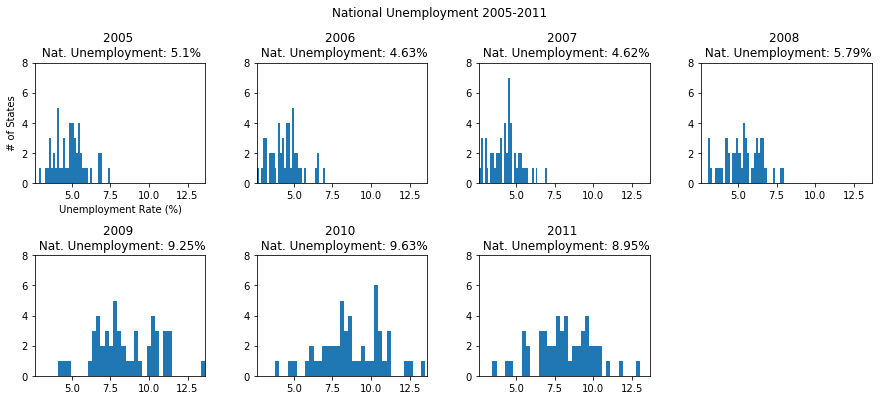

In [35]:
fig, axs = plt.subplots(2,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .6, wspace=.3)
x_lim = [min(df_vets['unemployment rate']), max(df_vets['unemployment rate'])]
y_lim = [0, 8]

axs = axs.ravel()

for ix, x  in df_vets.groupby('year'):
    i = ix - 2005
    nat_rate = round((x['unemployed'].sum() / x['labor force'].sum()) * 100, 2) 
    axs[i].hist(x['unemployment rate'], bins=35)
    axs[i].set_xlim(x_lim)
    axs[i].set_ylim(y_lim)
    axs[i].set_title(f'{str(ix)} \n Nat. Unemployment: {nat_rate}%') 

axs[0].set_xlabel("Unemployment Rate (%)")
axs[0].set_ylabel("# of States")
    
fig.subplots_adjust(top=0.85)    
fig.delaxes(axs[7])
fig.suptitle('National Unemployment 2005-2011')

## Identify Extremes

### Highest and Lowest Veteran Suicide Rates

In [36]:
df_vets.loc[df_vets['vet_rate'].idxmax()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate', 'unemployment rate']]

state                      MT
year                     2010
mhi                     45443
vet_suicides               68
vet_pop_p            0.124662
vet_rate               71.314
unemployment rate     7.29808
Name: 275, dtype: object

In [37]:
df_vets.loc[df_vets['vet_rate'].idxmin()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                      NE
year                     2006
mhi                     57312
vet_suicides                5
vet_pop_p            0.115304
vet_rate              3.29285
unemployment rate     3.11104
Name: 76, dtype: object

### Highest and Lowest Median Household Income

In [38]:
df_vets.loc[df_vets['mhi'].idxmax()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       NJ
year                      2006
mhi                      81018
vet_suicides                93
vet_pop_p            0.0795222
vet_rate               17.6444
unemployment rate      4.70987
Name: 79, dtype: object

In [39]:
df_vets.loc[df_vets['mhi'].idxmin()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       MS
year                      2009
mhi                      39240
vet_suicides                77
vet_pop_p            0.0935482
vet_rate               37.9027
unemployment rate      9.47759
Name: 223, dtype: object

### Highest and Lowest Unemployment Rate

In [40]:
df_vets.loc[df_vets['unemployment rate'].idxmax()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       MI
year                      2009
mhi                      51451
vet_suicides               232
vet_pop_p            0.0928234
vet_rate               32.8218
unemployment rate      13.6584
Name: 221, dtype: object

In [41]:
df_vets.loc[df_vets['unemployment rate'].idxmin()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       UT
year                      2007
mhi                      61964
vet_suicides                68
vet_pop_p            0.0854222
vet_rate               43.7094
unemployment rate      2.58076
Name: 143, dtype: object

# Visualize correlations between Suicide rates, Median Household Income, and Unemployment Rates.

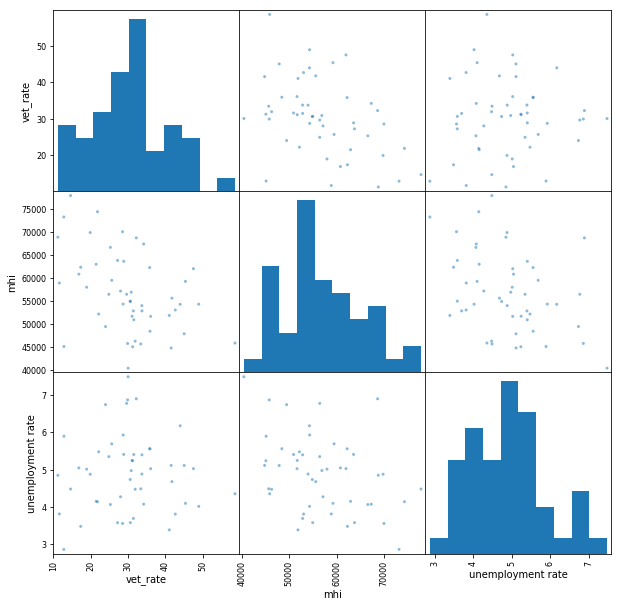

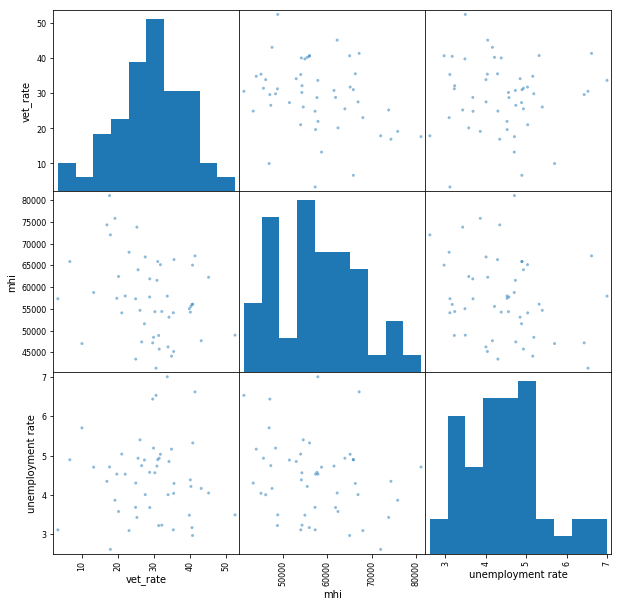

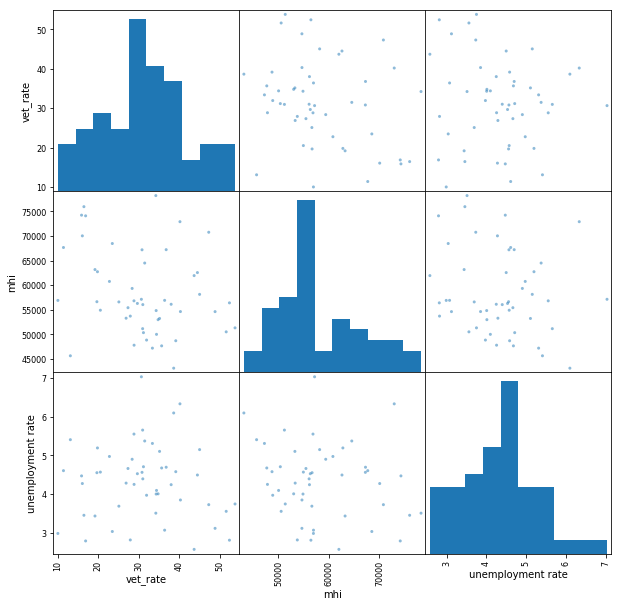

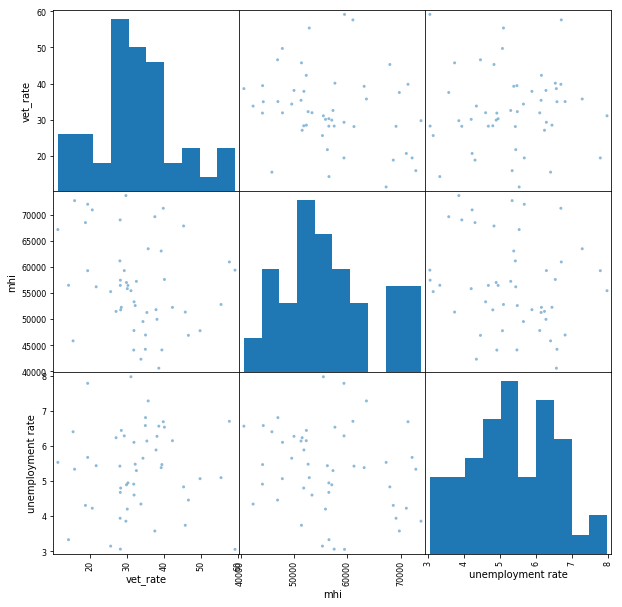

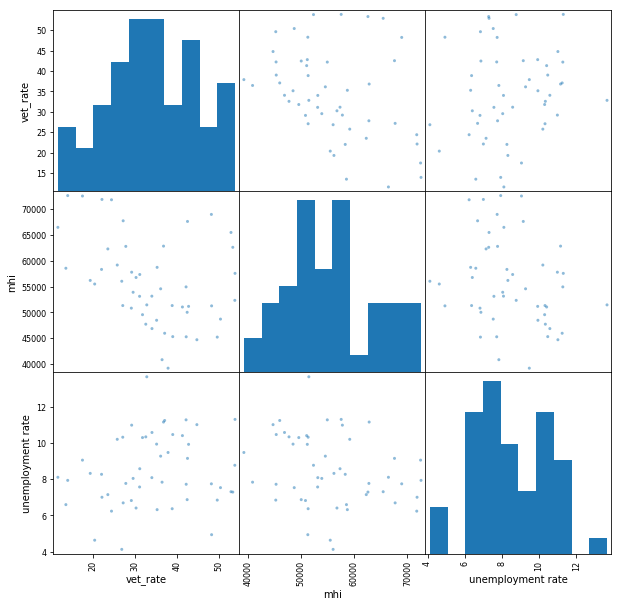

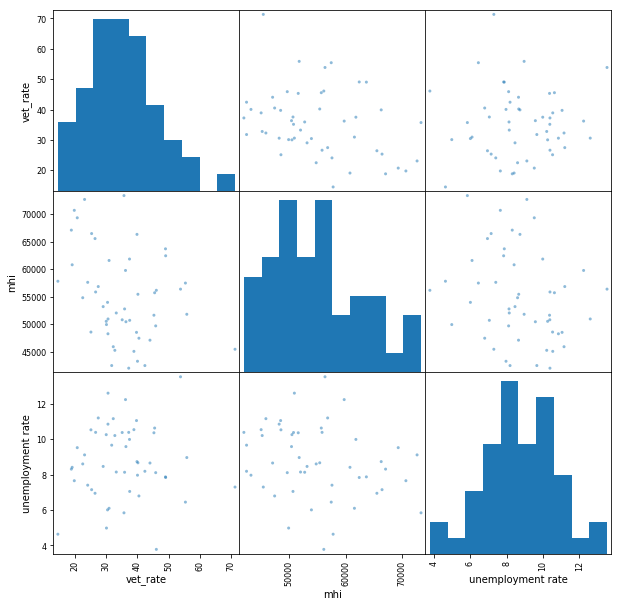

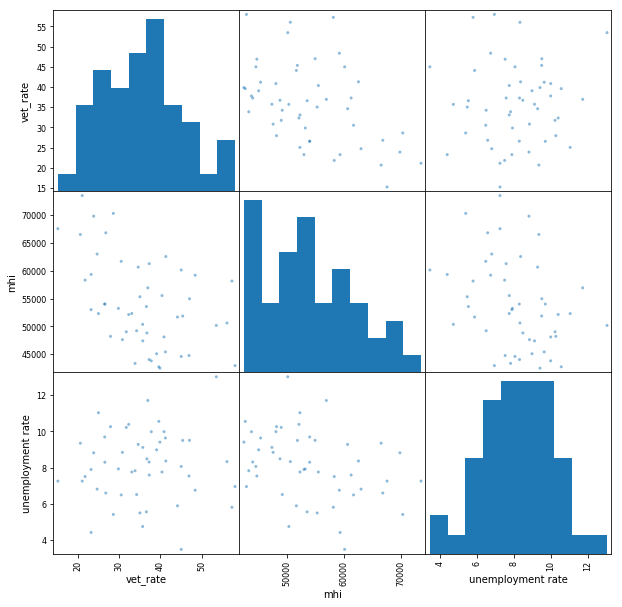

In [42]:
from pandas.plotting import scatter_matrix


for ix, x  in df_vets.groupby('year'):
    i = ix - 2005
    scatter_matrix(x[['vet_rate', 'mhi', 'unemployment rate']], figsize  = [10, 10])

# Focus on scatter plots of Suicide Rate vs. Median Household Income throughout the years

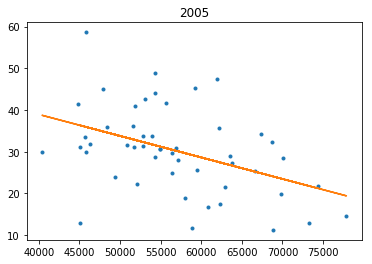

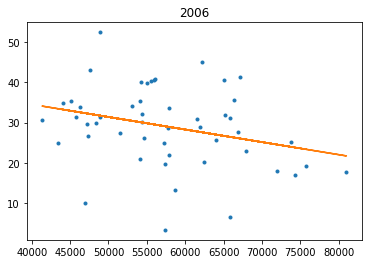

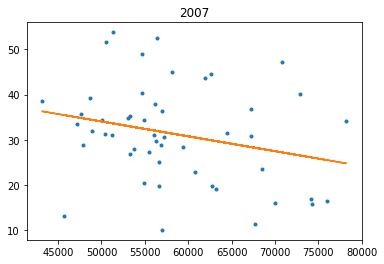

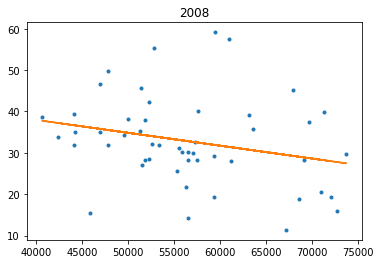

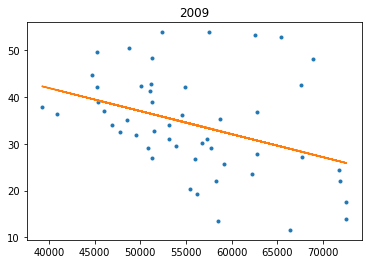

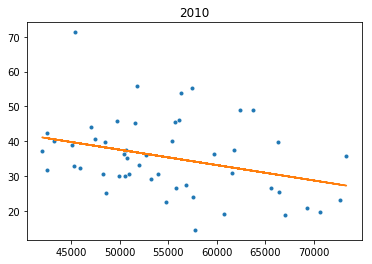

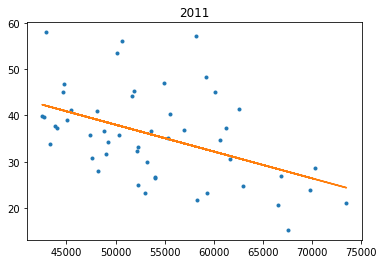

In [43]:
for ix, x  in df_vets.groupby('year'):
    plt.figure()
    m, b = np.polyfit(x['mhi'], x['vet_rate'], 1)
    plt.plot(x['mhi'], x['vet_rate'], '.')
    plt.plot(x['mhi'], m*x['mhi'] + b, '-')
    plt.title(ix)

# Identify Outliers

In [44]:
low_suicide_low_income = df_vets.loc[(df_vets['mhi'] < 50000) & (df_vets['vet_suicides_p'] < .1)]
low_suicide_low_income

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year,civ_pop,civ_suicides,civ_suicides_p,mhi,employed,labor force,unemployed,unemployment rate
16,KY,341752,3073085,0.111208,44,566,0.077739,12.874833,19.111547,2005,2731333,522,0.000191,45103.0,1881945,1999783,117838,5.892539
66,KY,340830,3192332,0.106765,34,622,0.054662,9.975648,20.620711,2006,2851502,588,0.000206,47003.0,1913479,2029239,115760,5.704602
116,KY,335093,3220471,0.104051,44,649,0.067797,13.130683,20.967790,2007,2885378,605,0.000210,45669.0,1922223,2032100,109877,5.407067
166,KY,329768,3242747,0.101694,51,612,0.083333,15.465418,19.258635,2008,2912979,561,0.000193,45870.0,1900687,2030744,130057,6.404402


In [45]:
high_suicide_high_income = df_vets.loc[(df_vets['mhi'] > 70000) & (df_vets['vet_suicides_p'] > .2)]
high_suicide_high_income

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year,civ_pop,civ_suicides,civ_suicides_p,mhi,employed,labor force,unemployed,unemployment rate
19,MD,480654,4038360,0.119022,105,472,0.222458,21.845236,10.315636,2005,3557706,367,0.000103,74369.0,2803491,2924546,121055,4.139275
28,NH,129603,967192,0.133999,37,162,0.228395,28.548722,14.923787,2005,837589,125,0.000149,70033.0,700028,725853,25825,3.557883
78,NH,130690,1015927,0.128641,33,151,0.218543,25.250593,13.329764,2006,885237,118,0.000133,73770.0,706779,731859,25080,3.426890
101,AK,74614,485178,0.153787,30,149,0.201342,40.206932,28.984519,2007,410564,119,0.000290,72920.0,328579,350786,22207,6.330640
105,CO,414228,3643412,0.113692,196,811,0.241677,47.316937,19.045059,2007,3229184,615,0.000190,70776.0,2565220,2664682,99462,3.732603
128,NH,122646,1016155,0.120696,42,158,0.265823,34.244900,12.982522,2007,893509,116,0.000130,78225.0,712007,737936,25929,3.513719
178,NH,121145,1021327,0.118615,36,179,0.201117,29.716455,15.885676,2008,900182,143,0.000159,73771.0,714115,742796,28681,3.861222
278,NH,114826,1029988,0.111483,41,196,0.209184,35.706199,16.936892,2010,915162,155,0.000169,73352.0,695136,738259,43123,5.841175


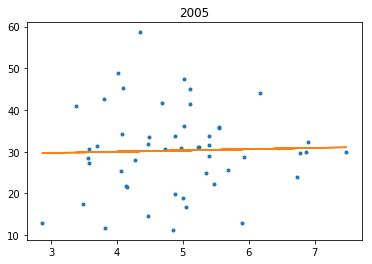

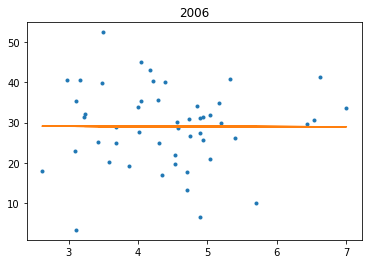

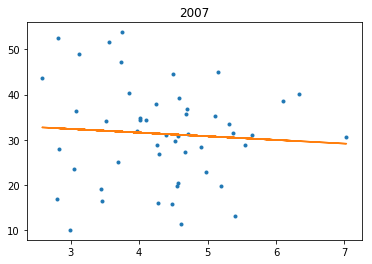

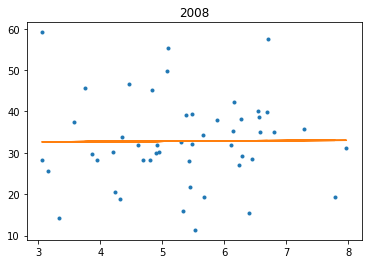

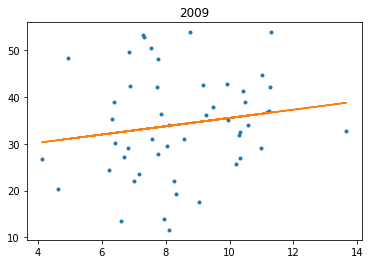

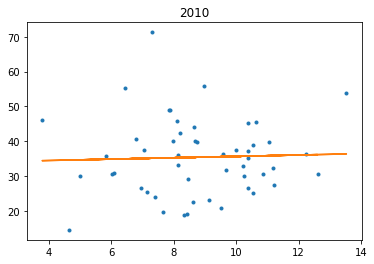

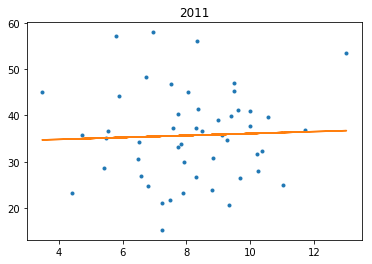

In [46]:
for ix, x  in df_vets.groupby('year'):
    plt.figure()
    m, b = np.polyfit(x['unemployment rate'], x['vet_rate'], 1)
    plt.plot(x['unemployment rate'], x['vet_rate'], '.')
    plt.plot(x['unemployment rate'], m*x['unemployment rate'] + b, '-')
    plt.title(ix)

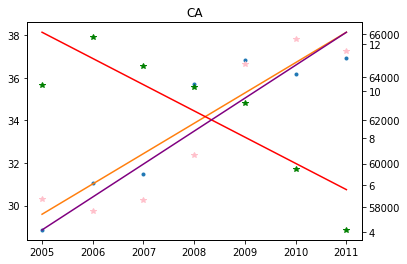

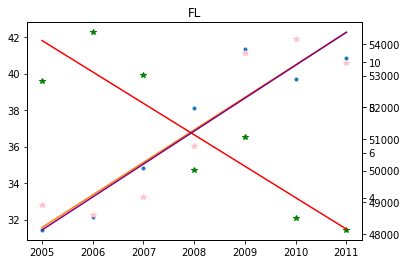

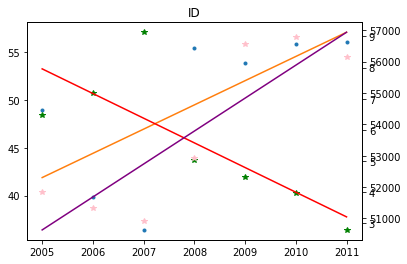

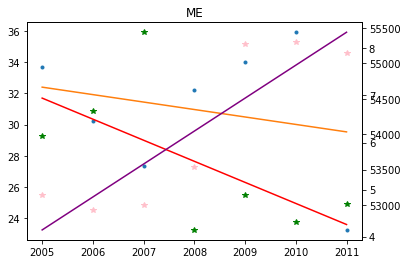

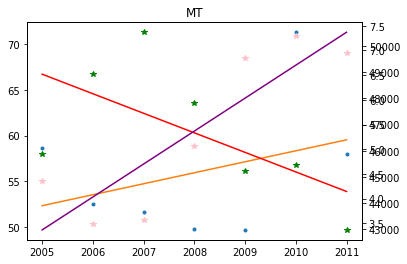

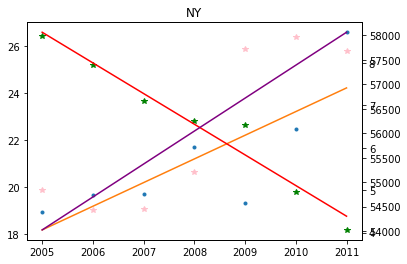

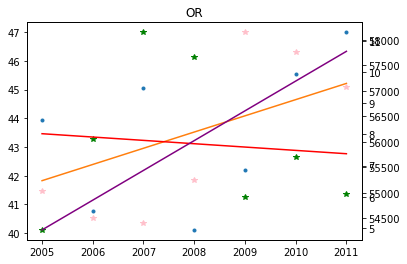

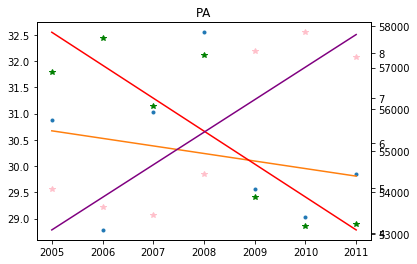

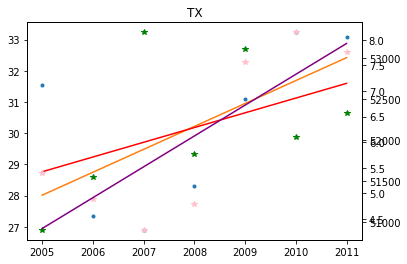

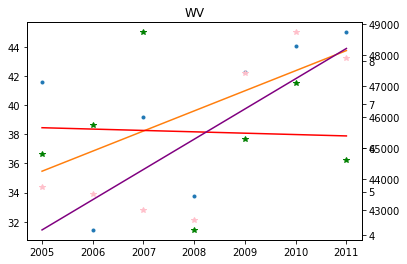

In [47]:
for ix, x  in df_vets.groupby('state'):
    states_int=["MT","WV","ID","ME","OR","CA","FL","NY","TX","PA"]
    if (x.iloc[0]["state"] not in states_int):
        continue
    plt.figure()
    fig, ax1 = plt.subplots()
    ax2=ax1.twinx()
    ax3=ax1.twinx()
    m, b = np.polyfit(x['year'], x['vet_rate'], 1)
    m2, b2 = np.polyfit(x['year'], x['mhi'], 1)
    m3, b3 = np.polyfit(x['year'], x['unemployment rate'], 1)
    
    ax1.plot(x['year'], x['vet_rate'], '.')
    ax2.plot(x['year'],x['mhi'],"*", color="green")
    ax3.plot(x['year'],x['unemployment rate'],"*", color="pink")
    
    ax1.plot(x['year'], m*x['year'] + b, '-')
    ax2.plot(x['year'], m2*x['year'] + b2, '-',color="red")
    ax3.plot(x['year'], m3*x['year'] + b3, '-',color="purple")
    
    plt.title(ix)

In [66]:
import plotly.plotly as py
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [72]:
for ix, df  in df_vets.groupby('year'):
    for col in df.columns:
        df[col] = df[col].astype(str)
        
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
    
    data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['state'],
        z = df['vet_rate'].astype(float),
        locationmode = 'USA-states',
        text = df['state']+": "+df["vet_rate"],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Suicide Rates per 100,000 population"
        )
    ) ]

    title_string=str(ix)+  " Suicide Rates"
    
    layout = dict(
        title = title_string+"<br>(Hover for breakdown)",
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
    fig= dict(data=data,layout=layout)
    
    url=py.plot(fig,filename=title_string)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

